<a href="https://colab.research.google.com/github/N1sChaLLL/ML_LAB/blob/main/Machine_Learnning_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [9]:
Data = pd.read_csv('ML_DATA_SET.csv') #This is our dataset
Data.head()

,10,about,additionally,after,all,also,an,and,answer,any,...,word,words,work,world,would,years,yes,you,your,Target
0,0.0,0.000000,0.0,0.237291,0.0,0.0,0.0,0.000000,0.084988,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.125129,0.0,0.000000,0.0,0.0,0.0,0.071341,0.117494,0.147442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
from sklearn.model_selection import train_test_split
X = Data.drop('Target',axis=1)
Y = Data["Target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)


In [13]:
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier with 3 neighbors
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report #Confusion matrix for training
print("Training")
y_pred1 = neigh.predict(X_train)
print(classification_report(Y_train , y_pred1))
print(confusion_matrix(Y_train,y_pred1))

Training
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11057
           1       0.66      0.19      0.29       623

    accuracy                           0.95     11680
   macro avg       0.81      0.59      0.63     11680
weighted avg       0.94      0.95      0.94     11680

[[10995    62]
 [  505   118]]


In [18]:
from sklearn.metrics import confusion_matrix,classification_report #Confusion Matrix for testing
y_pred = neigh.predict(X_test)

print("Testing")
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

Testing
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4736
           1       0.37      0.12      0.18       271

    accuracy                           0.94      5007
   macro avg       0.66      0.55      0.58      5007
weighted avg       0.92      0.94      0.93      5007

[[4680   56]
 [ 238   33]]


In [20]:
train_accuracy = neigh.score(X_train, Y_train)
test_accuracy = neigh.score(X_test, Y_test)
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1: #Condiiton to check the test and train accuracy
  print("Model is overfit")
elif train_accuracy < test_accuracy:
  print("Model is underfit")
else:
  print("Model is a regular fit")


Model is a regular fit


In [22]:
#Questiion 2

Price_Prediction = pd.read_excel('Lab Session Data.xlsx', sheet_name='IRCTC Stock Price')
Price_Prediction.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023


In [30]:
#Question 3
import random as rd

In [31]:
Training_Dict = {
    "X" : np.random.randint(10, size = 10),
    "Y" : np.random.randint(10, size = 10),
    "Class" : [0,1,1,0,0,0,1,0,1,0]
}
Training_Data = pd.DataFrame(Training_Dict)
Training_Data

,X,Y,Class
0,8,1,0
1,1,1,1
2,4,2,1
3,1,4,0
4,4,7,0
5,4,2,0
6,5,2,1
7,0,7,0
8,8,6,1
9,3,4,0


In [32]:
Training_Data['Color'] = Training_Data['Class'].apply(lambda x: 'red' if x == 1 else 'blue')
Training_Data

,X,Y,Class,Color
0,8,1,0,blue
1,1,1,1,red
2,4,2,1,red
3,1,4,0,blue
4,4,7,0,blue
5,4,2,0,blue
6,5,2,1,red
7,0,7,0,blue
8,8,6,1,red
9,3,4,0,blue


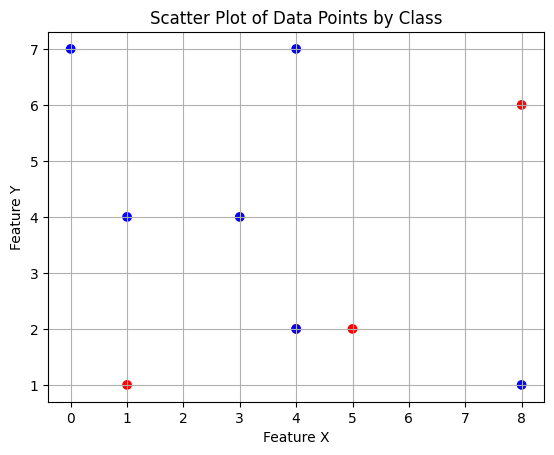

In [36]:
plt.scatter(Training_Data['X'], Training_Data['Y'], c=Training_Data['Color'])
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Data Points by Class')
plt.grid(True)
plt.show()

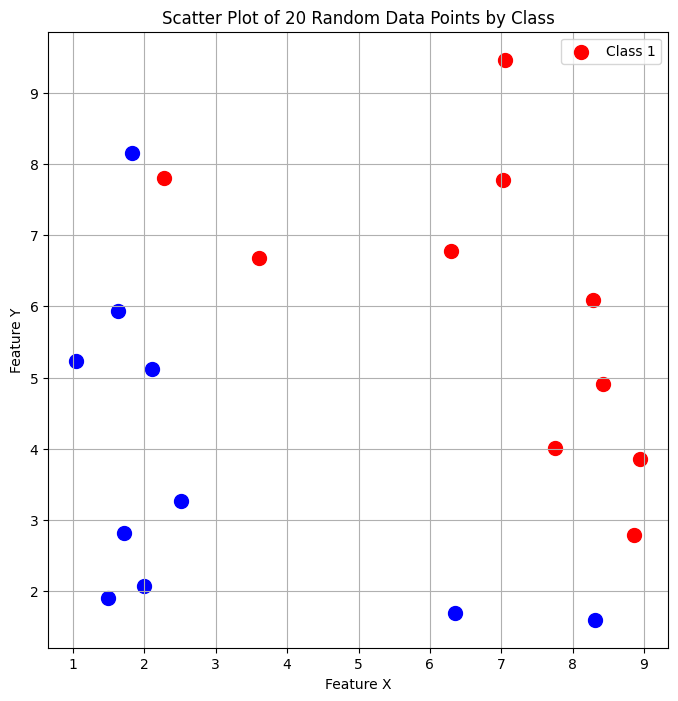

In [38]:
#Question 6 Dont know how this shit popped up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('ML_DATA_SET.csv')
random_sample = df.sample(n=20, random_state=42)

random_sample['X'] = np.random.uniform(1, 10, 20)
random_sample['Y'] = np.random.uniform(1, 10, 20)


random_sample['Class'] = np.where(random_sample['X'] + random_sample['Y'] < 10, 0, 1)

plt.figure(figsize=(8, 8))
for i in range(20):
    if random_sample['Class'].iloc[i] == 0:
        plt.scatter(random_sample['X'].iloc[i], random_sample['Y'].iloc[i], color='blue', label='Class 0' if i == 0 else "", s=100)
    else:
        plt.scatter(random_sample['X'].iloc[i], random_sample['Y'].iloc[i], color='red', label='Class 1' if i == 0 else "", s=100)


plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of 20 Random Data Points by Class')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
#Question 4
Test_X = np.arange(0,10.1,0.1)
Test_Y = np.arange(0,10.1,0.1) #This is to generated our points by incrementing one
print(Test_X)
print(Test_Y)


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5

In [62]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
X_flat = Test_X.reshape(-1, 1) #Transforming the above 1D array to 2D array so the built in function can accept it
Y_flat = Test_Y.reshape(-1, 1)
#Y_flat = np.repeat(Y_flat, 2, axis=0) #This is to adjust the same amount of rows of X_Flat to Y_FLat

neigh.fit(X_flat, Y_flat)

KNeighborsRegressor(n_neighbors=3)

In [70]:
print(X_flat)
print(Y_flat)

[[ 0. ]
 [ 0.1]
 [ 0.2]
 [ 0.3]
 [ 0.4]
 [ 0.5]
 [ 0.6]
 [ 0.7]
 [ 0.8]
 [ 0.9]
 [ 1. ]
 [ 1.1]
 [ 1.2]
 [ 1.3]
 [ 1.4]
 [ 1.5]
 [ 1.6]
 [ 1.7]
 [ 1.8]
 [ 1.9]
 [ 2. ]
 [ 2.1]
 [ 2.2]
 [ 2.3]
 [ 2.4]
 [ 2.5]
 [ 2.6]
 [ 2.7]
 [ 2.8]
 [ 2.9]
 [ 3. ]
 [ 3.1]
 [ 3.2]
 [ 3.3]
 [ 3.4]
 [ 3.5]
 [ 3.6]
 [ 3.7]
 [ 3.8]
 [ 3.9]
 [ 4. ]
 [ 4.1]
 [ 4.2]
 [ 4.3]
 [ 4.4]
 [ 4.5]
 [ 4.6]
 [ 4.7]
 [ 4.8]
 [ 4.9]
 [ 5. ]
 [ 5.1]
 [ 5.2]
 [ 5.3]
 [ 5.4]
 [ 5.5]
 [ 5.6]
 [ 5.7]
 [ 5.8]
 [ 5.9]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.3]
 [ 6.4]
 [ 6.5]
 [ 6.6]
 [ 6.7]
 [ 6.8]
 [ 6.9]
 [ 7. ]
 [ 7.1]
 [ 7.2]
 [ 7.3]
 [ 7.4]
 [ 7.5]
 [ 7.6]
 [ 7.7]
 [ 7.8]
 [ 7.9]
 [ 8. ]
 [ 8.1]
 [ 8.2]
 [ 8.3]
 [ 8.4]
 [ 8.5]
 [ 8.6]
 [ 8.7]
 [ 8.8]
 [ 8.9]
 [ 9. ]
 [ 9.1]
 [ 9.2]
 [ 9.3]
 [ 9.4]
 [ 9.5]
 [ 9.6]
 [ 9.7]
 [ 9.8]
 [ 9.9]
 [10. ]]
[[ 0. ]
 [ 0.1]
 [ 0.2]
 [ 0.3]
 [ 0.4]
 [ 0.5]
 [ 0.6]
 [ 0.7]
 [ 0.8]
 [ 0.9]
 [ 1. ]
 [ 1.1]
 [ 1.2]
 [ 1.3]
 [ 1.4]
 [ 1.5]
 [ 1.6]
 [ 1.7]
 [ 1.8]
 [ 1.9]
 [ 2. ]
 [ 2.1]
 [ 2.2]
 [ 2.3]

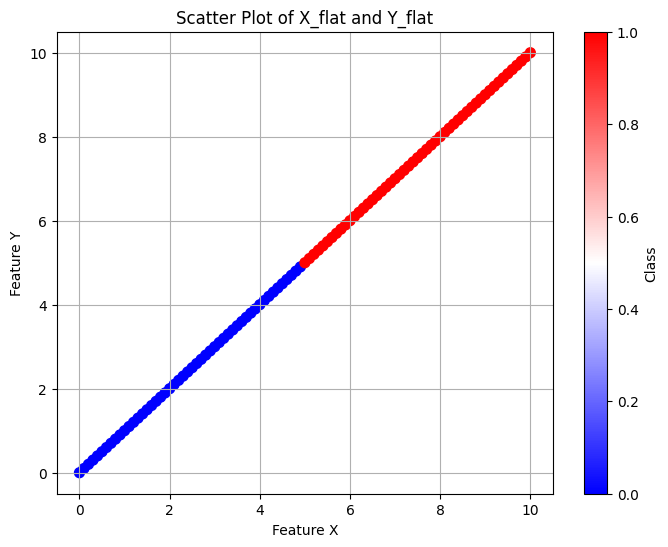

In [87]:

class_labels = np.where(X_flat + Y_flat < 10, 0, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X_flat, Y_flat, c=class_labels, cmap='bwr', s=50)
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of X_flat and Y_flat')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()
